In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, roc_auc_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# 2. Load dataset
df = pd.read_csv('process_dataset.csv')

# 3. Separate features and target
X = df.drop('remainder__satisfaction_encoded', axis=1)
y = df['remainder__satisfaction_encoded']

# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [6]:
# BASELINE RANDOM FOREST

rf_default = RandomForestClassifier(random_state=42)
rf_default.fit(X_train, y_train)
y_pred_default = rf_default.predict(X_test)

print(" BASELINE RANDOM FOREST----")
print()
print("Accuracy:", accuracy_score(y_test, y_pred_default))
print("Precision:", precision_score(y_test, y_pred_default))
print("Recall:", recall_score(y_test, y_pred_default))
print("F1 Score:", f1_score(y_test, y_pred_default))
print("AUC:", roc_auc_score(y_test, y_pred_default))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_default))

 BASELINE RANDOM FOREST----

Accuracy: 0.9435761589403974
Precision: 0.9536981358989778
Recall: 0.9210220673635308
F1 Score: 0.9370753323485967
AUC: 0.9417579893563879
Confusion Matrix:
 [[1976   77]
 [ 136 1586]]


In [7]:
# MANUAL TUNING

rf_manual = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    random_state=42
)
rf_manual.fit(X_train, y_train)
y_pred_manual = rf_manual.predict(X_test)

print(" MANUALLY TUNED RANDOM FOREST------")
print("Accuracy:", accuracy_score(y_test, y_pred_manual))
print("Precision:", precision_score(y_test, y_pred_manual))
print("Recall:", recall_score(y_test, y_pred_manual))
print("F1 Score:", f1_score(y_test, y_pred_manual))
print("AUC:", roc_auc_score(y_test, y_pred_manual))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_manual))


 MANUALLY TUNED RANDOM FOREST------
Accuracy: 0.9393377483443709
Precision: 0.9435531788472965
Recall: 0.9221835075493612
F1 Score: 0.9327459618208517
AUC: 0.9379548809057083
Confusion Matrix:
 [[1958   95]
 [ 134 1588]]


In [8]:
# MODEL 3 – GRID SEARCH TUNING

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1
)
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
y_pred_grid = best_rf.predict(X_test)

print(" GRIDSEARCHCV BEST RANDOM FOREST------")
print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_grid))
print("Precision:", precision_score(y_test, y_pred_grid))
print("Recall:", recall_score(y_test, y_pred_grid))
print("F1 Score:", f1_score(y_test, y_pred_grid))
print("AUC:", roc_auc_score(y_test, y_pred_grid))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_grid))


 GRIDSEARCHCV BEST RANDOM FOREST------
Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.9435761589403974
Precision: 0.956442831215971
Recall: 0.9181184668989547
F1 Score: 0.9368888888888889
AUC: 0.9415239192750984
Confusion Matrix:
 [[1981   72]
 [ 141 1581]]


In [9]:
# MODEL PERFORMANCE COMPARISON TABLE

comparison = pd.DataFrame({
    'Model': ['Baseline RF', 'Manual Tuned RF', 'GridSearchCV Best RF'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_default),
        accuracy_score(y_test, y_pred_manual),
        accuracy_score(y_test, y_pred_grid)
    ],
    'Precision': [
        precision_score(y_test, y_pred_default),
        precision_score(y_test, y_pred_manual),
        precision_score(y_test, y_pred_grid)
    ],
    'Recall': [
        recall_score(y_test, y_pred_default),
        recall_score(y_test, y_pred_manual),
        recall_score(y_test, y_pred_grid)
    ],
    'F1 Score': [
        f1_score(y_test, y_pred_default),
        f1_score(y_test, y_pred_manual),
        f1_score(y_test, y_pred_grid)
    ],
    'AUC': [
        roc_auc_score(y_test, y_pred_default),
        roc_auc_score(y_test, y_pred_manual),
        roc_auc_score(y_test, y_pred_grid)
    ]
})


=== MODEL PERFORMANCE COMPARISON ===
                  Model  Accuracy  Precision    Recall  F1 Score       AUC
0           Baseline RF  0.943576   0.953698  0.921022  0.937075  0.941758
1       Manual Tuned RF  0.939338   0.943553  0.922184  0.932746  0.937955
2  GridSearchCV Best RF  0.943576   0.956443  0.918118  0.936889  0.941524


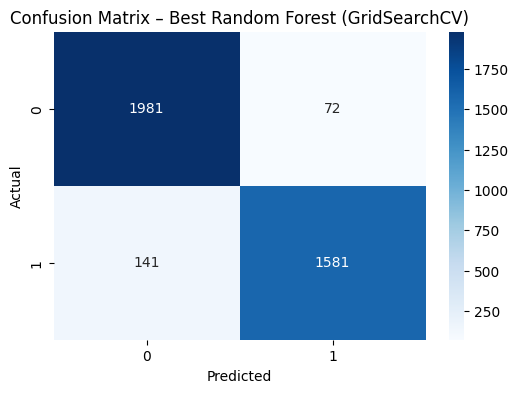

In [10]:
# Display table
print("\n=== MODEL PERFORMANCE COMPARISON ===")
print(comparison)

# --------------------------
# VISUALIZE CONFUSION MATRIX OF BEST MODEL
# --------------------------
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_grid), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix – Best Random Forest (GridSearchCV)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()